In [425]:
from gym import Env
from gym.spaces import Discrete, Box
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display, clear_output
from collections import namedtuple
import numpy as np
import random
import time

def staticprint(x):
    clear_output(wait=True)
    display(x)

In [426]:
from enum import IntEnum
from random import *

class MazeGenerator:
    def __init__(self, w = 5, h = 5, startpt = 0, endpt = 0, startx = 0, starty = 0):
        self.maze = self.prims(w, h, startpt, endpt, startx, starty)

    class Node(IntEnum):
        FRONTIER = 2 
        IN = 1
        OUT = 0

    class Cell(IntEnum):
        OPEN = 0
        WALL = 1
        START = 2
        END = 3
        PATH = 4

    # Out nodes surrounding a marked node.
    def add_frontier(x, y, grid, frontier):
        in_maze = (x >= 0 and y >= 0 and x < grid.shape[0] and y < grid.shape[1])
        if (in_maze and grid[x][y] == Node.OUT):
            grid[x][y] = Node.FRONTIER
            frontier.append((x,y))

    # Marks a given frontier node as an in node.
    def mark(x, y, grid, frontier):
        grid[x][y] = Node.IN
        add_frontier(x-1, y, grid, frontier) # west
        add_frontier(x+1, y, grid, frontier) # east
        add_frontier(x, y-1, grid, frontier) # south
        add_frontier(x, y+1, grid, frontier) # north

    # Checks the number of in neighbors surrounding a node.
    def check_neighbors(x, y, grid):
        count = 0
        west = (x - 1 >= 0) and (grid[x-1][y] == Node.IN)
        east = (x + 1 < grid.shape[0]) and (grid[x+1][y] == Node.IN)
        south = (y - 1 >= 0) and (grid[x][y-1] == Node.IN)
        north = (y + 1 < grid.shape[1]) and (grid[x][y+1] == Node.IN)
        if west: count += 1
        if east: count += 1
        if south: count += 1
        if north: count += 1
        return count

    def prims(self, w = 5, h = 5, startpt = 0, endpt = 0, startx = 0, starty = 0):
        # w = x
        # h = y
        if (startpt == 0):
            startpt = (0,0)
        if (endpt == 0):
            endpt = (h-1,w-1)
        grid = np.array([[Node.OUT]*w]*h)
        wallgrid = np.array([[Cell.OPEN]*w]*h)
        frontier = []
        mark(startx, starty, grid, frontier)
        while len(frontier) != 0:
            # Selects a random frontier node
            #print(grid)
            fcell = randint(0, len(frontier) - 1)
            x, y = frontier[fcell]
            frontier.pop(fcell)
            n = check_neighbors(x, y, grid)
            if n > 2:
                mark(x, y, grid, frontier)
                wallgrid[x][y] = Cell.WALL
            else:
                mark(x, y, grid, frontier)
                wallgrid[x][y] = Cell.OPEN
            wallgrid[startpt[0]][startpt[1]] = Cell.START
            wallgrid[endpt[0]][endpt[1]] = Cell.END
        return wallgrid
    
    def display(self):
        grid = self.maze
        cmap = ListedColormap(['w','k','r','b'])
        #r, c = grid.shape
        #row_labels = range(r)
        #col_labels = range(c)
        plt.matshow(grid,cmap=cmap)
        #plt.xticks(range(c), col_labels)
        #plt.yticks(range(r), row_labels)
        plt.show()


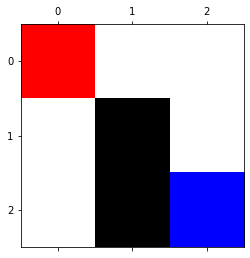

In [432]:
maze = MazeGenerator(3,3)
maze.display()

In [ ]:
def add_neighbor(x, y, grid, nodes):
    in_maze = (x >= 0 and y >= 0 and x < grid.shape[0] and y < grid.shape[1])
    if (in_maze and grid[x][y] == Cell.OPEN):
        nodes.append((x,y))

def mark(x, y, grid, frontier):
    grid[x][y] = Node.IN
    add_neighbor(x-1, y, grid, frontier) # west
    add_neighbor(x+1, y, grid, frontier) # east
    add_neighbor(x, y-1, grid, frontier) # south
    add_neighbor(x, y+1, grid, frontier) # north

def pathfinder(grid):
    ncell = randint(0, len(nodes) - 1)
    x, y = nodes[ncell]
    nodes.pop(ncell)
    

In [ ]:
# Adjascency List representation in Python


class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None


class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node

        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


if __name__ == "__main__":
    V = 5

    # Create graph and edges
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 2)
    graph.add_edge(0, 3)
    graph.add_edge(1, 2)

    graph.print_agraph()

In [10]:
class Maze():
    def __init__(self, size):
        Point = namedtuple('Point',['x','y'])
        self.size = size
        self.start = Point(0,0)
        self.end = Point(size-1, size-1)

    def buildMaze(self):
        Cell = namedtuple('Cell',['n', 's', 'e', 'w'])
        print(self.size)

        

In [ ]:
class MazeEnv(Env):
    def __init__(self):
        self.action_space = Discrete(4)
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
    def step(self):
        pass
    def render(self):
        pass
    def reset(self):
        pass